# Señales Continuas


## Señales Estándar

Ciertas [señales](https://en.wikipedia.org/wiki/Signal_%28electrical_engineering%29) juegan un papel importante en la aplicación teórica y práctica del [procesamiento de señales](https://en.wikipedia.org/wiki/Signal_processing). Surgen de la teoría de señales y sistemas, son usadas para caracterizar las propiedades de los sistemas lineales invarientes den el tiempo (LTI) o ocurren frecuentemente en aplicaciones prácticas. Estas señales estándar son introducidas e ilustradas a continuación. 
Se limita a señales deterministicas de una dimensión y a señales de amplitud continua.

### Selñal exponencial compleja

La señal exponencial compleja está definifa por la [función exponencial compleja](https://en.wikipedia.org/wiki/Exponential_function#Complex_plane)

\begin{equation}
x(t) = e^{s t} 
\end{equation}

donde $s = \sigma + j \omega$ denota la frecuencia compleja con $\sigma, \omega \in \mathbb{R}$. La señal es usada a menudo como una representación general de señales. Usando [la fórmula de Euler](https://en.wikipedia.org/wiki/Euler's_formula) anterior, la definición se puede reformular como

\begin{equation}
x(t) = e^{(\sigma + j \omega) t} = e^{\sigma t} \cos(\omega t) + j e^{\sigma t} \sin(\omega t)
\end{equation}

La parte real/imaginaria de la señal exponencial está dada por un seno/coseno con frecuencia angular $\omega = 2 \pi f$. Para $t>0$, el peso dependiente del tiempo $e^{\sigma t}$ es

* exponencialmente decreciente con el tiemo para $\sigma < 0$,
* constantemente uno para $\sigma = 0$,
* exponencialmente creciente con el tiemo para $\sigma > 0$,

y viceversa para $t<0$. La señal exponencial compleja es usada para modelar señales armónicas con amplitud exponencialmente decreciente o creciente.

**Ejemplo**

El ejemplo ilustra la señal exponencial compleja y sus parámetros. El módulo de Python [SymPy](http://docs.sympy.org/latest/index.html)es usado para este propósito. Este proporciona funcionalidad para las variables y funciones simbólicas, así como su cálculo. Las variables simbólicas requeridas deben definirse explícitamente antes de su uso. El este ejemplo, $t$, $\omega$ y $\sigma$ son defnidos como variables simbólicas reales, seguido por la definición de la propia señal exponencial.

In [2]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, sigma, omega = sym.symbols('t sigma omega', real=True)
s = sigma + 1j*omega
x = sym.exp(s*t)
x

Ahora tomando valores específicos para la frecuencia compleja $s = \sigma + j \omega$ con fines ilustrativos. Una nueva señal es definida mediante la sustitución de $\sigma$ y $\omega$ con valores especiíicos. La parte real e imaginaria de la señal es graficada para ilustración.

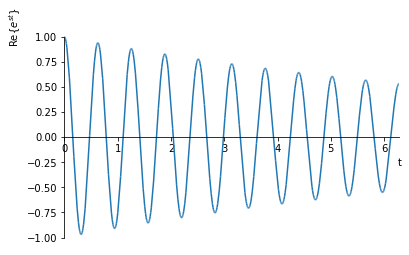

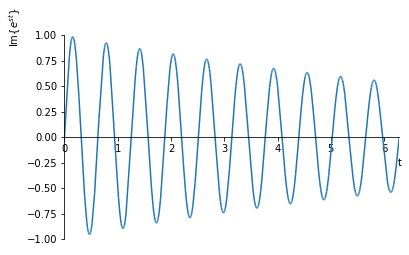

In [9]:
y = x.subs({omega: 10, sigma : -.1})

sym.plot(sym.re(y), (t, 0, 2*sym.pi), ylabel=r'Re{$e^{st}$}')
sym.plot(sym.im(y), (t, 0, 2*sym.pi), ylabel=r'Im{$e^{st}$}');

**Ejercicio**

* Pruebe otros valores `omega` y `sigma` para crear señales con amplitud creciente/decreciente/constante y diferentes frecuencias angulares.  

### Impulso de Dirac

El impulso de Dirac es una de las más importantes señales en la teoría de señales y sistemas. Es usada para la caracterización de sistemas LTI y el modelado de señales similares a impulsos. El impulso de Dirac es definido de la forma [Función delta de Dirac](https://en.wikipedia.org/wiki/Dirac_delta_function) la cual no es una función en el sentido convencional. Es una función generalizada o *distribución*. El impulso de Dirac es denotado como $\delta(t)$. La función delta de Dirac se define por su efecto en otras funciones. Un tratamiento riguroso está más allá del alcance de este material del curso. Por favor referirse a la bibliografía para una discusión detallada de los fundamentos matemáticos de la distribución delta de Dirac. Afortunadamente para su aplicación en el procesamiento de señales, es adecuado considerar solo ciertas propiedades. Las más relevantes son:

1. **Propiedad de selectividad**
    \begin{equation}
    \int_{-\infty}^{\infty} \delta(t) \cdot x(t) = x(0)
    \end{equation}
    donde $x(t)$ necesita ser diferenciable en $t=0$. La propiedad de selectividad implica $\int_{-\infty}^{\infty} \delta(t) = 1$.
    
2. **Multiplicación**
    \begin{equation}
    x(t) \cdot \delta(t) = x(0) \cdot \delta(t)
    \end{equation}
    donde $x(t)$ necesita ser diferenciable en $t=0$.
    
3. **Linealidad**
    \begin{equation}
    a \cdot \delta(t) + b \cdot \delta(t) = (a+b) \cdot \delta(t)
    \end{equation}
    
4. **Escamalmiento**
    \begin{equation}
    \delta(a t) = \frac{1}{|a|} \delta(t)
    \end{equation}
    donde $a \in \mathbb{R} \setminus 0$. Esto implica que el impulso de Dirac es una función con simetría uniforme.
    
5. **Derivación**
    \begin{equation}
    \int_{-\infty}^{\infty} \frac{d \delta(t)}{dt} \cdot x(t) \; dt = - \frac{d x(t)}{dt} \bigg\vert_{t = 0}
    \end{equation}

Es importante notar que el producto de $\delta(t) \cdot \delta(t)$ dos impulsos de Dirac no está definido.

**Ejemplo**

Este ejemplo ilustra alguanas propiedades básicas del simpulso de Dirac. Primero definamos un impulso de Dirac por medio de la función delta de Dirac

In [11]:
delta = sym.DiracDelta(t)
delta

Ahora probemos la propiedad sifting definiendo una señal arbitraria (función) $f(t)$ e integrando su producto con el impulso Delta

In [12]:
f = sym.Function('f')(t)
sym.integrate(delta*f, (t, -sym.oo, sym.oo))

**Ejercicio**

* Derivar la propiedad de selectividad, para una un impulso de Dirac desplazado $\delta(t-\tau)$ y probar los resultados modificando el ejemplo anterior.

### Heaviside Signal

The Heaviside signal is defined by the [Heaviside step function](https://en.wikipedia.org/wiki/Heaviside_step_function)

\begin{equation}
\epsilon(t) = \begin{cases} 0 & t<0 \\  \frac{1}{2} & t=0 \\ 1 & t > 0 \end{cases}
\end{equation}

Note that alternative definitions exist that differ with respect to the value of $\epsilon(t)$ at $t=0$. The Heaviside signal is used to represent a signal that switches on at a specified time and stays switched on indefinitely. The Heaviside signal can be related to the Dirac impulse by

\begin{equation}
\int_{-\infty}^{t} \delta(\tau) \; d\tau = \epsilon(t)
\end{equation}

**Example**

In the following, a Heaviside signal $\epsilon(t)$ is defined and plotted. Note that `Sympy` denotes the Heaviside function by $\theta(t)$.

In [5]:
step = sym.Heaviside(t)
step

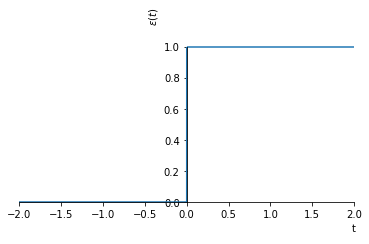

In [6]:
sym.plot(step, (t, -2, 2), ylim=[-0.2, 1.2], ylabel=r'$\epsilon(t)$');

Let's construct a harmonic signal $\cos(\omega t)$ with $\omega=2$ which is switched on at $t=0$. Considering the definition of the Heaviside function, the desired signal is given as 

\begin{equation}
x(t) = \cos(\omega t) \cdot \epsilon(t)
\end{equation}

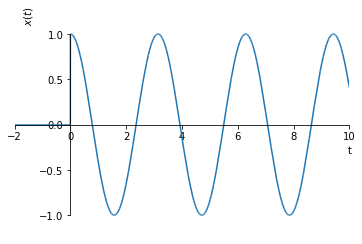

In [7]:
x = sym.cos(omega*t) * sym.Heaviside(t)
sym.plot(x.subs(omega,2), (t, -2, 10), ylim=[-1.2, 1.2], ylabel=r'$x(t)$');

### Rectangular Signal

The rectangular signal is defined by the [rectangular function](https://en.wikipedia.org/wiki/Rectangular_function)

\begin{equation}
\text{rect}(t) = \begin{cases} 1 & |t| < \frac{1}{2} \\ \frac{1}{2} & |t| = \frac{1}{2} \\ 1 & |t| > \frac{1}{2} \end{cases}
\end{equation}

Note that alternative definitions exist that differ with respect to the value of $\text{rect}(t)$ at $t = \pm \frac{1}{2}$. The rectangular signal is used to represent a signal which is switched on for a limited period of time or has finite duration. The rectangular signal can be related to the Heaviside signal by

\begin{equation}
\text{rect}(t) = \epsilon \left(t + \frac{1}{2} \right) - \epsilon \left(t - \frac{1}{2} \right)
\end{equation}

**Example**

The Heaviside function is used to define a rectangular function in `Sympy`. This function is then used as rectangular signal.

In [8]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

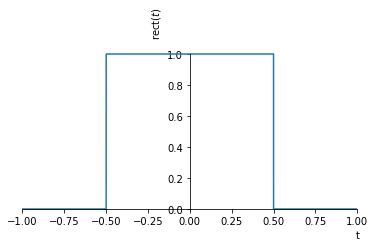

In [9]:
sym.plot(rect(t), (t, -1, 1), ylim=[-0.2, 1.2], ylabel=r'rect$(t)$');

**Exercise**

* Use $\text{rect}(t)$ to construct a harmonic signal $\cos(\omega t)$ with $\omega=2$ which is switched on at $t=-\frac{1}{2}$ and switched off at $t=+\frac{1}{2}$.

### Sign Signal

The sign signal is defined by the [sign/signum function](https://en.wikipedia.org/wiki/Sign_function) which evaluates the sign of its argument

\begin{equation}
\text{sgn}(t) = \begin{cases} 1 & t>0 \\ 0 & t=0 \\ -1 & t < 0  \end{cases}
\end{equation}

The sign signal is useful to represent the absolute value of a real-valued signal $x(t) \in \mathbb{R}$ by a multiplication

\begin{equation}
|x(t)| = x(t) \cdot \text{sgn}(x(t))
\end{equation}

It is related to the Heaviside function by

\begin{equation}
\text{sgn}(t) = 2 \cdot \epsilon(t) - 1
\end{equation}

**Example**

The following example illustrates the sign signal $\text{sgn}(t)$. Note that the sign function is represented as $\text{sign}(t)$ in `Sympy`.

In [10]:
sgn = sym.sign(t)
sgn

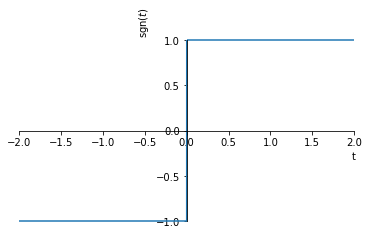

In [11]:
sym.plot(sgn, (t, -2, 2), ylim=[-1.2, 1.2], ylabel=r'sgn$(t)$');

**Exercise**

* Check the values of $\text{sgn}(t)$ for $t \to 0^-$, $t = 0$ and $t \to 0^+$ as implemented in `SymPy`. Do they conform to above definition?

**Copyright**

The notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebook for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Signals and Systems* by Sascha Spors.